In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
filepath = '/kaggle/input/customer-personality-analysis/'
all_data = pd.read_csv(filepath+'marketing_campaign.csv',sep='\t',index_col='ID')
all_data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [3]:
all_data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [4]:
all_data['Kids'] = all_data['Kidhome']+all_data['Teenhome']
all_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1


In [5]:
all_data = all_data.drop(columns=['Kidhome', 'Teenhome'])

In [6]:
all_data['Age'] = 2015 - all_data['Year_Birth']
all_data = all_data.drop(columns=['Year_Birth'])

In [7]:
all_data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Age
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,0,58
2174,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,2,61
4141,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,0,50
6182,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,1,31
5324,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,1,34


In [8]:
all_data = all_data.assign(is_married=['Relationship' if x in ['Married','Together'] else 'Single' for x in all_data['Marital_Status']]).drop(columns=['Marital_Status'])

In [9]:
all_data['Dt_parsed'] = pd.to_datetime(all_data['Dt_Customer'],format = "%d-%m-%Y")
all_data = all_data.drop(columns=['Dt_Customer'])

In [10]:
basedate = pd.Timestamp('2015-12-31')
all_data['Enroll_days'] = (basedate - all_data['Dt_parsed']).dt.days
all_data = all_data.drop(columns=['Dt_parsed'])

In [11]:
all_data = all_data.assign(Education=['Postgrad' if x in ['PhD','Master','2n Cycle','Graduation'] else 'Undergrad' for x in all_data['Education']])

In [12]:
all_data = all_data.drop(columns=['Z_CostContact','Z_Revenue'])

## See correlations of all features before clustering

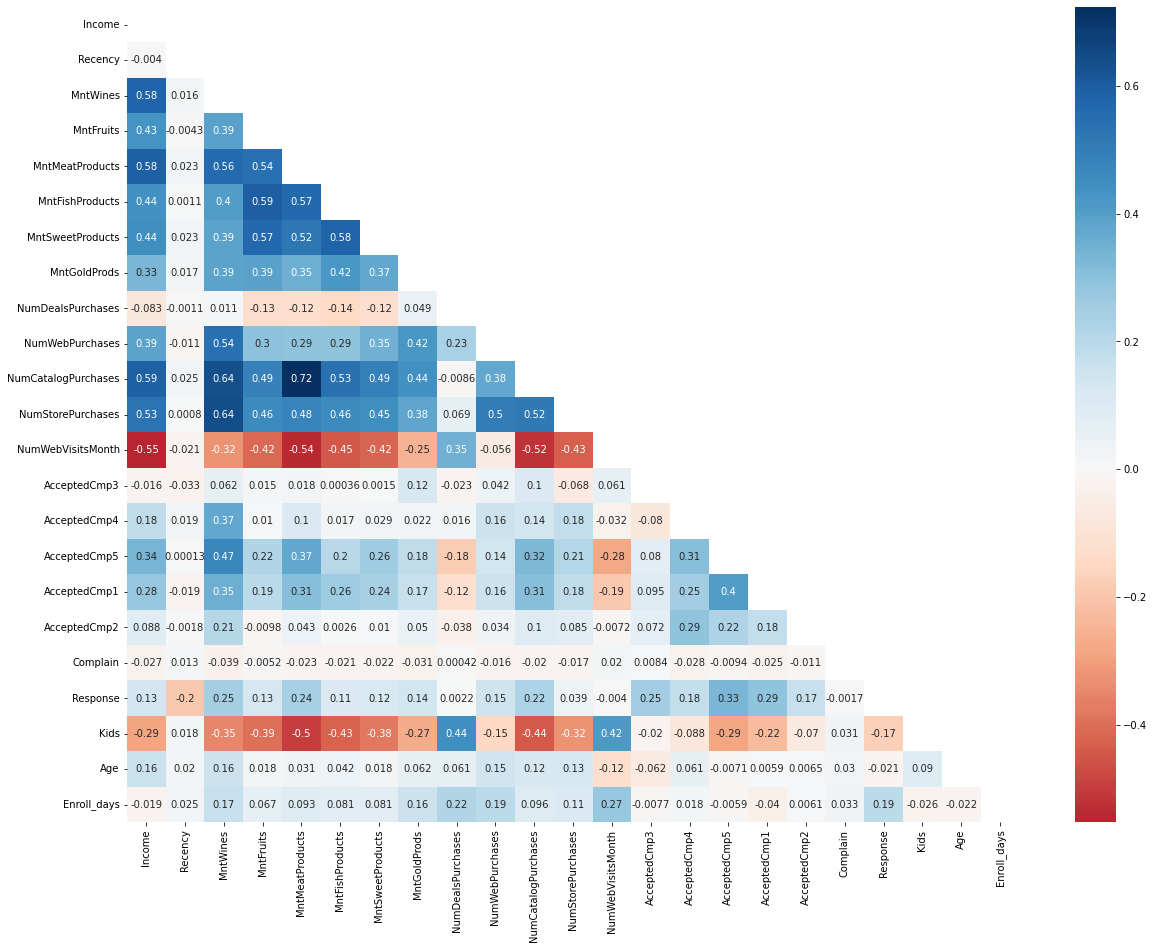

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (20, 15))
# Mask to hide upper-right part of plot as it is a duplicate
mask = np.transpose(np.tril(np.ones(all_data.corr().shape)))
sns.heatmap(all_data.corr(), annot = True, center = 0, cmap = 'RdBu', mask = mask);

### Observations from correlation map:
#### 1) Amount of spending on the different categories (wine, meat, fruit, etc.) are all positively correlated, and the correlations among them are quite even ==> Combine these columns into 1 column "Expenses". The same goes for NumPurchases columns.
#### 2) The "AcceptedCmp" columns are very similar to each other. Aggregating them might be more helpful ==> Combine them into 1 column "Total accepted Cmp".
#### 3) "Complain" "Recency" are not informative.

In [14]:
all_data['Expenses'] = all_data['MntWines'] + all_data['MntFruits'] + all_data['MntMeatProducts'] + all_data['MntFishProducts'] + all_data['MntSweetProducts'] +all_data['MntGoldProds']
all_data['TotalAcceptedCmp'] = all_data['AcceptedCmp1'] + all_data['AcceptedCmp2'] + all_data['AcceptedCmp3'] + all_data['AcceptedCmp4'] + all_data['AcceptedCmp5'] + all_data['Response']
all_data['NumPurchases'] = all_data['NumDealsPurchases'] + all_data['NumWebPurchases'] + all_data['NumCatalogPurchases'] + all_data['NumStorePurchases']
all_data = all_data.drop(columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'Complain','Recency'])
all_data.head(10)

,Education,Income,NumWebVisitsMonth,Kids,Age,is_married,Enroll_days,Expenses,TotalAcceptedCmp,NumPurchases
ID,,,,,,,,,,
5524,Postgrad,58138.0,7,0,58,Single,1213,1617,1,25
2174,Postgrad,46344.0,5,2,61,Single,663,27,0,6
4141,Postgrad,71613.0,4,0,50,Relationship,862,776,0,21
6182,Postgrad,26646.0,6,1,31,Relationship,689,53,0,8
5324,Postgrad,58293.0,5,1,34,Relationship,711,422,0,19
7446,Postgrad,62513.0,6,1,48,Relationship,843,716,0,22
965,Postgrad,55635.0,6,1,44,Single,1143,590,0,21
6177,Postgrad,33454.0,8,1,30,Relationship,967,169,0,10
4855,Postgrad,30351.0,9,1,41,Relationship,938,46,1,6


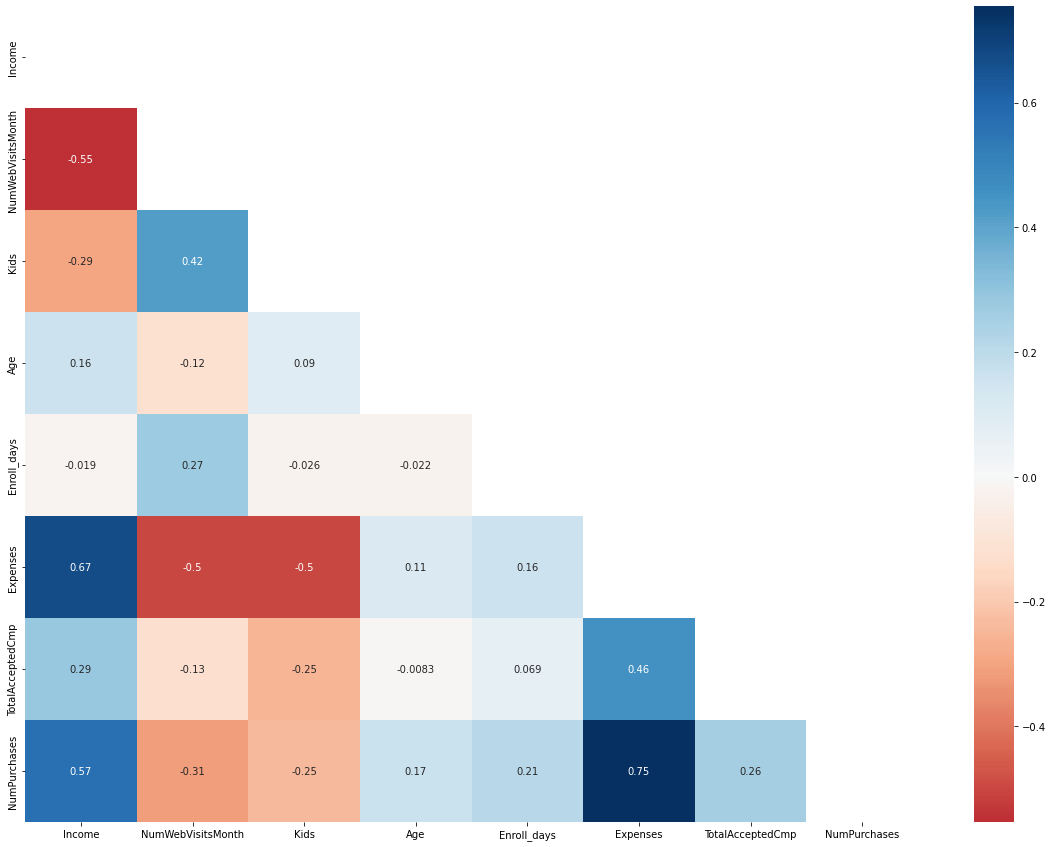

In [15]:
plt.figure(figsize= (20, 15))
# Mask to hide upper-right part of plot as it is a duplicate
mask = np.transpose(np.tril(np.ones(all_data.corr().shape)))
sns.heatmap(all_data.corr(), annot = True, center = 0, cmap = 'RdBu', mask = mask);

In [16]:
import plotly.express as px
fig = px.bar(all_data, x='Enroll_days', y='Expenses',color = 'Enroll_days')
fig.show()

In [17]:
all_data.info()
cont_features = all_data.iloc[:, 1:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2216 non-null   float64
 2   NumWebVisitsMonth  2240 non-null   int64  
 3   Kids               2240 non-null   int64  
 4   Age                2240 non-null   int64  
 5   is_married         2240 non-null   object 
 6   Enroll_days        2240 non-null   int64  
 7   Expenses           2240 non-null   int64  
 8   TotalAcceptedCmp   2240 non-null   int64  
 9   NumPurchases       2240 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 192.5+ KB


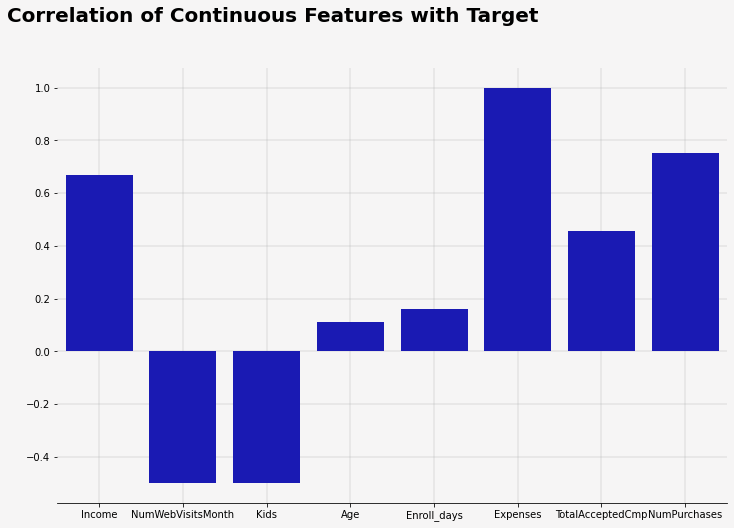

In [18]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(12, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(all_data['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='mediumblue', zorder=3, linewidth=2)
ax0.grid(which='major', axis='x', zorder=0, linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()


#### Summary:
#### 1) Expenses is highly correlated with Total Number of Purchases (0.75), Income (0.67), and moderately correlated with Total Accepted Campaigns.
#### 2) Expenses is negatively correlated with Number od Kids and Number of Web Visits.
#### 3) No-so relevant factors: Age, Enroll history.

## Clustering

### one-hot encoding

In [19]:
# X = all_data.copy()
# X = pd.get_dummies(X)
# X.head()
# from sklearn.model_selection import train_test_split

# X_train, X_valid = train_test_split(all_data,train_size=0.8, test_size=0.2,random_state=0)

### Label Encoding

In [20]:
X = all_data.copy()
X.head()

,Education,Income,NumWebVisitsMonth,Kids,Age,is_married,Enroll_days,Expenses,TotalAcceptedCmp,NumPurchases
ID,,,,,,,,,,
5524,Postgrad,58138.0,7,0,58,Single,1213,1617,1,25
2174,Postgrad,46344.0,5,2,61,Single,663,27,0,6
4141,Postgrad,71613.0,4,0,50,Relationship,862,776,0,21
6182,Postgrad,26646.0,6,1,31,Relationship,689,53,0,8
5324,Postgrad,58293.0,5,1,34,Relationship,711,422,0,19


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Education'] = label_encoder.fit_transform(X['Education'])
X['is_married'] = label_encoder.fit_transform(X['is_married'])

In [22]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Income    24
dtype: int64


### simple imputing

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X))
X_imputed.columns = X.columns
X_imputed.index = X.index
#X_valid = pd.DataFrame(imputer.fit_transform(X_valid))

In [24]:
X = X_imputed
X.head()

,Education,Income,NumWebVisitsMonth,Kids,Age,is_married,Enroll_days,Expenses,TotalAcceptedCmp,NumPurchases
ID,,,,,,,,,,
5524,0.0,58138.0,7.0,0.0,58.0,1.0,1213.0,1617.0,1.0,25.0
2174,0.0,46344.0,5.0,2.0,61.0,1.0,663.0,27.0,0.0,6.0
4141,0.0,71613.0,4.0,0.0,50.0,0.0,862.0,776.0,0.0,21.0
6182,0.0,26646.0,6.0,1.0,31.0,0.0,689.0,53.0,0.0,8.0
5324,0.0,58293.0,5.0,1.0,34.0,0.0,711.0,422.0,0.0,19.0


### standard scaling (only numerical columns)

In [25]:
X.columns

Index(['Education', 'Income', 'NumWebVisitsMonth', 'Kids', 'Age', 'is_married',
       'Enroll_days', 'Expenses', 'TotalAcceptedCmp', 'NumPurchases'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numer_cols = ['Income', 'Expenses', 'NumPurchases',
              'NumWebVisitsMonth', 'Kids', 'Age', 'Enroll_days','TotalAcceptedCmp']#,'Recency']

categ_cols = ['Education', 'is_married']#,'AcceptedCmp3','Complain']

In [27]:
numer = X[numer_cols]
categ = X[categ_cols]
numer.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,Age,Enroll_days,TotalAcceptedCmp
ID,,,,,,,,
5524,58138.0,1617.0,25.0,7.0,0.0,58.0,1213.0,1.0
2174,46344.0,27.0,6.0,5.0,2.0,61.0,663.0,0.0
4141,71613.0,776.0,21.0,4.0,0.0,50.0,862.0,0.0
6182,26646.0,53.0,8.0,6.0,1.0,31.0,689.0,0.0
5324,58293.0,422.0,19.0,5.0,1.0,34.0,711.0,0.0


In [28]:
numer_scaled = pd.DataFrame(StandardScaler().fit_transform(numer))
numer_scaled.columns = numer.columns
numer_scaled.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,Age,Enroll_days,TotalAcceptedCmp
0,0.235696,1.679417,1.320826,0.693904,-1.264505,0.985345,1.531185,0.621248
1,-0.235454,-0.961275,-1.154596,-0.130463,1.396361,1.235733,-1.190545,-0.501912
2,0.773999,0.282673,0.799685,-0.542647,-1.264505,0.317643,-0.205773,-0.501912
3,-1.022355,-0.918094,-0.894025,0.281720,0.065928,-1.268149,-1.061881,-0.501912
4,0.241888,-0.305254,0.539114,-0.130463,0.065928,-1.017761,-0.953012,-0.501912


In [29]:
X = pd.concat([numer_scaled, categ], axis=1, join='inner')
#X = X_scaled
X.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,Age,Enroll_days,TotalAcceptedCmp,Education,is_married
0,0.235696,1.679417,1.320826,0.693904,-1.264505,0.985345,1.531185,0.621248,0.0,0.0
1,-0.235454,-0.961275,-1.154596,-0.130463,1.396361,1.235733,-1.190545,-0.501912,0.0,1.0
9,-1.861189,-0.924738,-1.675737,6.052291,1.396361,1.569584,-1.215288,0.621248,0.0,1.0
13,0.284273,-0.491265,0.017972,0.281720,1.396361,1.402658,-0.631353,-0.501912,0.0,1.0
17,-0.578370,-0.479640,-0.242598,0.693904,-1.264505,1.903435,1.550979,-0.501912,0.0,0.0


In [30]:
X=X.drop(columns=['Age','Enroll_days'])

### Build clusters.

#### Elbow methods to check how many clusters are needed.

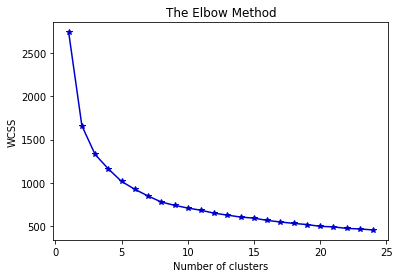

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss,color = "mediumblue",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[-0.55072906, -0.68305039, -0.5408297 ,  0.52484406,  0.46609701,
        -0.26499572,  0.03515625,  0.3671875 ],
       [ 0.81563176,  1.09147992,  0.88030321, -0.65878721, -0.61766494,
         0.50955271,  0.02209945,  0.35359116]])

In [33]:
X["Cluster"] = clusters
X.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,TotalAcceptedCmp,Education,is_married,Cluster
0,0.235696,1.679417,1.320826,0.693904,-1.264505,0.621248,0.0,0.0,1
1,-0.235454,-0.961275,-1.154596,-0.130463,1.396361,-0.501912,0.0,1.0,0
9,-1.861189,-0.924738,-1.675737,6.052291,1.396361,0.621248,0.0,1.0,0
13,0.284273,-0.491265,0.017972,0.281720,1.396361,-0.501912,0.0,1.0,0
17,-0.578370,-0.479640,-0.242598,0.693904,-1.264505,-0.501912,0.0,0.0,0


In [34]:
from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.3814541894181423

In [35]:
metrics.calinski_harabasz_score(X, labels)

311.53602642853355

In [36]:
metrics.davies_bouldin_score(X, labels)

1.0973239565023312

### Simple visualization (w/ selected features)
#### By changing feature1 and feature2, the personality and spending behaviors of different segments can be visualized.

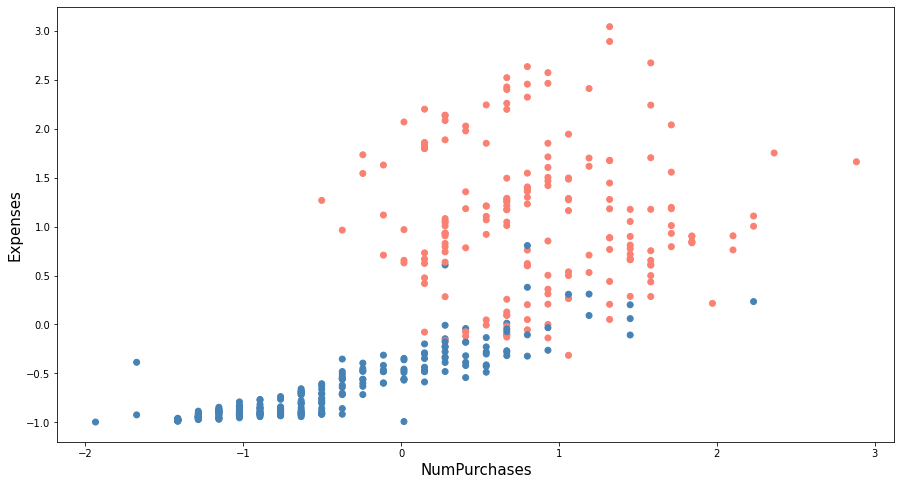

In [37]:
plt.figure(figsize= (15,8))
feature1, feature2 = 'NumPurchases','Expenses'
colors = {0:'steelblue',1:'salmon',2:"gray",3:'forestgreen',4:'magenta'}
plt.scatter(X[feature1],X[feature2],c=X['Cluster'].map(colors))
plt.xlabel(feature1,fontsize=15)
plt.ylabel(feature2,fontsize=15)
#plt.yscale('log')
plt.show()

### Brief Summary:
#### 1) Customers can be segmented into 2-3 clusters for pratical purposes.
#### 2) If segmented into 2 groups -- Blue-colored customers feature as lower income, lower number of purchases, (slightly) more kids, (slightly) less educated, and accepted less campagign discounts. Salmon-colored customers are the opposite.
#### 3) Marketing Strategies for blue customers: sell more to them. They are unlikely to spend too much money on expensive items, but increasing the number of purchases are very effective in increasing expanses. However, they don't tend to buy with past/current discounts/promotions. We may improve targeted promotions for them.
#### 4) Marketing Strategies for salmon customers: increase their loyalty to products and increase price. They don't tend to spend more even if they purchase many times.

### Use PCA to visualize

In [38]:
from sklearn.decomposition import PCA

In [39]:
# #plotX is a DataFrame containing 5000 values sampled randomly from X
# plotX = pd.DataFrame(np.array(X.sample(5000)))

# #Rename plotX's columns since it was briefly converted to an np.array above
# plotX.columns = X.columns
plotX = X
plotX.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,TotalAcceptedCmp,Education,is_married,Cluster
0,0.235696,1.679417,1.320826,0.693904,-1.264505,0.621248,0.0,0.0,1
1,-0.235454,-0.961275,-1.154596,-0.130463,1.396361,-0.501912,0.0,1.0,0
9,-1.861189,-0.924738,-1.675737,6.052291,1.396361,0.621248,0.0,1.0,0
13,0.284273,-0.491265,0.017972,0.281720,1.396361,-0.501912,0.0,1.0,0
17,-0.578370,-0.479640,-0.242598,0.693904,-1.264505,-0.501912,0.0,0.0,0


In [40]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [41]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [42]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [43]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX.head()

,Income,Expenses,NumPurchases,NumWebVisitsMonth,Kids,TotalAcceptedCmp,Education,is_married,Cluster,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d
0,0.235696,1.679417,1.320826,0.693904,-1.264505,0.621248,0.0,0.0,1,1.821156,1.821156,0.794882,1.821156,0.794882,0.033121
1,-0.235454,-0.961275,-1.154596,-0.130463,1.396361,-0.501912,0.0,1.0,0,-1.721508,-1.721508,-0.479515,-1.721508,-0.479515,0.269063
9,-1.861189,-0.924738,-1.675737,6.052291,1.396361,0.621248,0.0,1.0,0,-1.966088,-1.966088,-0.118475,-1.966088,-0.118475,0.460024
13,0.284273,-0.491265,0.017972,0.281720,1.396361,-0.501912,0.0,1.0,0,2.981036,2.981036,2.000993,2.981036,2.000993,1.496425
17,-0.578370,-0.479640,-0.242598,0.693904,-1.264505,-0.501912,0.0,0.0,0,0.443603,0.443603,2.624258,0.443603,2.624258,0.094206


In [44]:
plotX["dummy"] = 0

In [45]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [46]:
#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [47]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [48]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [49]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [50]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)